<a href="https://colab.research.google.com/github/willydata/Predicion-Acciones-con-fbprophet/blob/main/Prediccion_de_Acciones_de_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
import requests

download_url = "https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1586913095&period2=1618449095&interval=1d&events=history&includeAdjustedClose=true"
target_csv_path = "TSLA.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")


Download ready.


In [3]:
TSLA = pd.read_csv("TSLA.csv")
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
1,2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
2,2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000
3,2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000
4,2020-04-21,146.024002,150.666000,134.757996,137.343994,137.343994,101045500


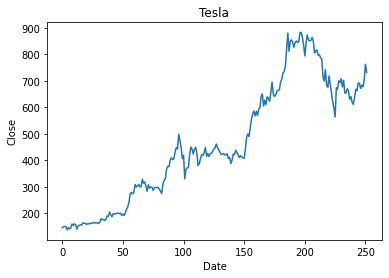

In [4]:
close = TSLA['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [5]:
TSLA = TSLA.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
TSLA.head()

,Date,Close
0,2020-04-15,145.966003
1,2020-04-16,149.042007
2,2020-04-17,150.778000
3,2020-04-20,149.272003
4,2020-04-21,137.343994


In [6]:
TSLA['Date'] = pd.to_datetime(TSLA['Date'],infer_datetime_format=True)
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [7]:
TSLA = TSLA.rename(columns={'Date': 'ds','Close':'y' })

In [8]:
model = Prophet()

In [9]:
model.fit(TSLA)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
predict = model.make_future_dataframe(periods=365)

In [11]:
forcast = model.predict(predict)

In [12]:
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
612,2022-04-10,-176.171685,-1011.950747,565.938249
613,2022-04-11,-200.811632,-1055.716499,544.151267
614,2022-04-12,-200.408020,-1046.041196,548.262695
615,2022-04-13,-202.630217,-1050.178341,543.288505
616,2022-04-14,-207.557210,-1048.262280,549.785337


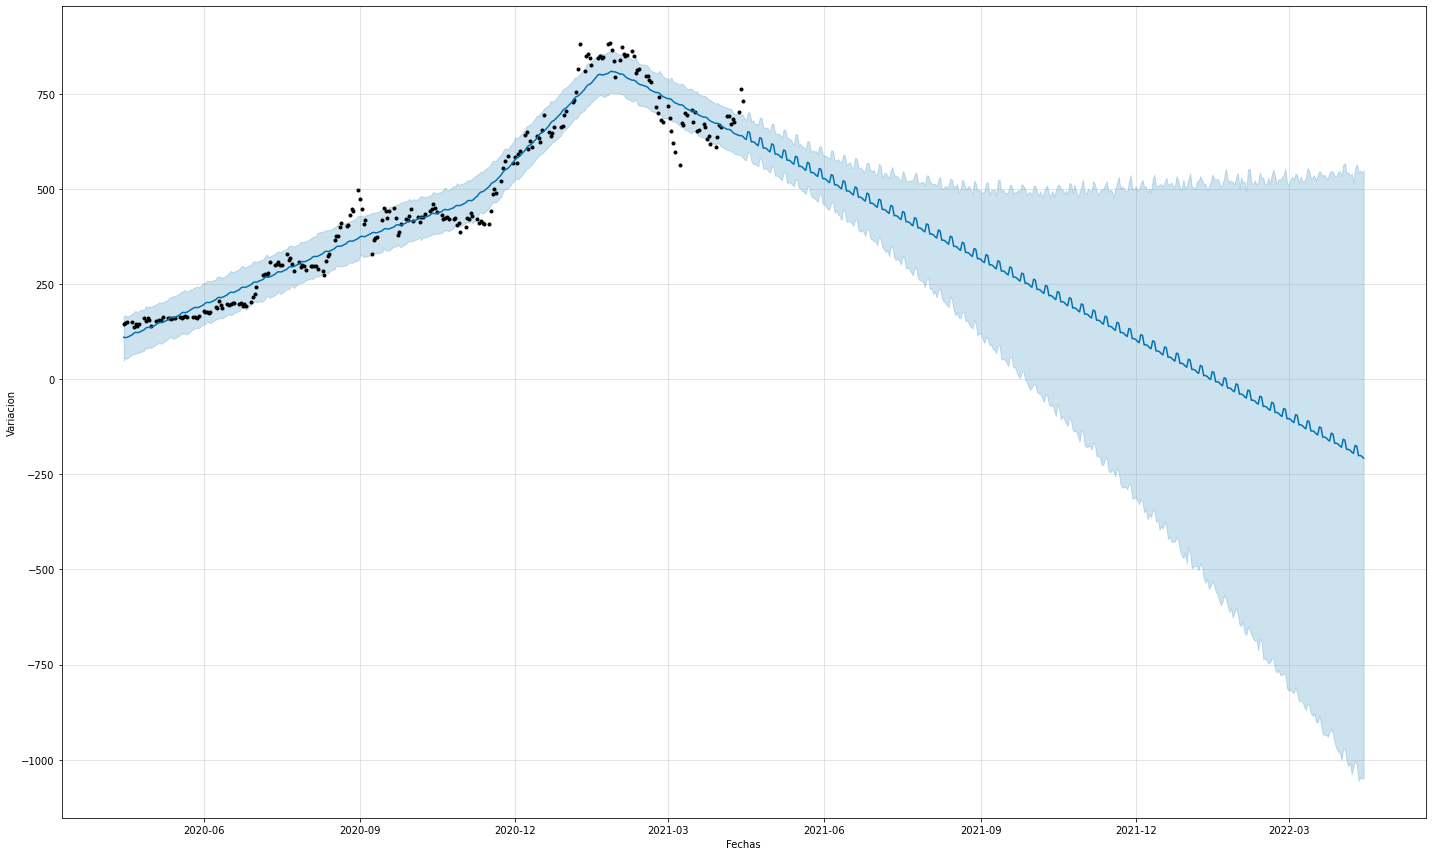

In [14]:
graph = model.plot(forcast,xlabel='Fechas',ylabel='Variacion',figsize=(20,12))